In [1]:
import geopandas as gpd
import pandas as pd
import fiona
import matplotlib as plt
import os

In [2]:
df = gpd.read_file('bdnb.gpkg')
df.head()
# But, this only shows one of the subdatasets (or layers) of the file .gpkg...

,cle_interop_adr,code_departement_insee,numero,rep,nom_voie,type_voie,code_commune_insee,code_postal,libelle_commune,source,nb_bat_grp,nb_bat_grp_hors_dep,geometry
0,183284640096306,34,20,NaN,des jardins d'alkinoos,rue,34172,NaN,Montpellier,Arcep,1,1,POINT (767634.030 6281632.930)
1,183284660096304,34,28,NaN,des jardins d'alkinoos,rue,34172,NaN,Montpellier,Arcep,1,1,POINT (767630.210 6281642.330)
2,183284680096302,34,42,NaN,des jardins d'alkinoos,rue,34172,NaN,Montpellier,Arcep,1,1,POINT (767621.090 6281657.350)
3,183284700096300,34,50,NaN,des jardins d'alkinoos,rue,34172,NaN,Montpellier,Arcep,1,1,POINT (767617.690 6281666.430)
4,183284720096298,34,58,NaN,des jardins d'alkinoos,rue,34172,NaN,Montpellier,Arcep,1,1,POINT (767614.360 6281675.840)


In [3]:
# Open the GeoPackage file as a geopandas GeoDataFrame
gdf = gpd.read_file('bdnb.gpkg')

# Print the list of all sub-datasets within the GeoDataFrame
print("Sub-datasets within the GeoDataFrame:", gdf.columns)

Sub-datasets within the GeoDataFrame: Index(['cle_interop_adr', 'code_departement_insee', 'numero', 'rep',
       'nom_voie', 'type_voie', 'code_commune_insee', 'code_postal',
       'libelle_commune', 'source', 'nb_bat_grp', 'nb_bat_grp_hors_dep',
       'geometry'],
      dtype='object')


In [4]:
def layers(file):
    """
    Showing all the layers of a .gpkg file
    
    ---
    Parameters:
    file : format .gpkg
    
    ---
    Output: 
    list containing the name of all the layers
    """

    # Open the GeoPackage file with fiona to get a list of all the layers
    gpkg = fiona.open(file, 'r')
    layer_names = fiona.listlayers(file)

    return layer_names

In [5]:
layers('bdnb.gpkg')

['adresse_compile',
 'rel_batiment_groupe_adresse',
 'batiment_construction',
 'batiment_groupe_compile',
 'parcelle',
 'rel_batiment_groupe_parcelle',
 'proprietaire',
 'rel_batiment_groupe_proprietaire',
 'dpe_logement',
 'rel_batiment_groupe_bdtopo_bat',
 'rel_batiment_groupe_bdtopo_equ',
 'rel_batiment_groupe_bdtopo_zoa',
 'rel_batiment_groupe_bpe',
 'rel_batiment_groupe_dpe_logement',
 'rel_batiment_groupe_merimee',
 'rel_batiment_groupe_qpv',
 'rel_batiment_groupe_rnc']

In [6]:
# Exemple
gdf_construction = gpd.read_file('bdnb.gpkg', layer='batiment_construction')
gdf_construction.head()

,batiment_construction_id,batiment_groupe_id,code_departement_insee,code_iris,code_commune_insee,s_geom_cstr,hauteur,altitude_sol,fictive_geom_cstr,geometry
0,BATIMENT0000000027761378-1,34344000AN0027_d3d9dbb5b7a932d,34,NaN,34344,43.0,5.0,NaN,False,"MULTIPOLYGON (((789383.034 6274342.661, 789382..."
1,BATIMENT0000000044491755-1,uf341110066800_ae6cbc327e53f2e,34,341110000,34111,88.0,5.0,147.8,False,"MULTIPOLYGON (((755586.100 6315711.800, 755586..."
2,BATIMENT0000000044598079-1,34154000BK0150_646bda0981afcac,34,341540106,34154,25.0,2.4,0.9,False,"MULTIPOLYGON (((782341.700 6277260.600, 782337..."
3,BATIMENT0000000044729356-1,341670000B0210_b492fcc25163c36,34,341670000,34167,21.0,6.0,6.0,False,"MULTIPOLYGON (((701346.700 6242217.400, 701348..."
4,BATIMENT0000000044490815-1,34174000AB0074_26733157640e037,34,341740000,34174,107.0,7.3,245.9,False,"MULTIPOLYGON (((758683.500 6316920.800, 758685..."


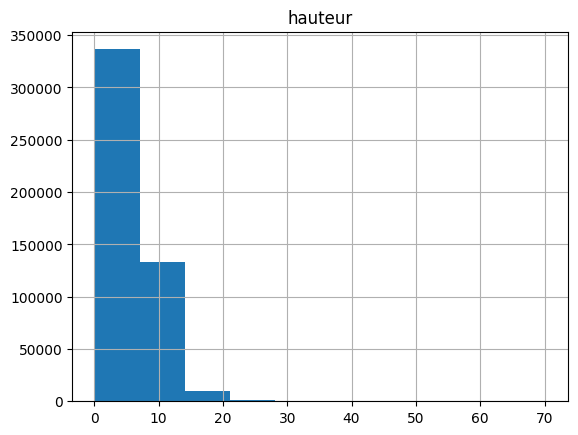

In [7]:
def plot_height(file):
    construction = gpd.read_file(file, layer='batiment_construction')
    construction.hist('hauteur', bins=10)

plot_height('bdnb.gpkg')

dict_keys(['34001', '34002', '34003', '34004', '34005', '34006', '34007', '34008', '34009', '34010', '34011', '34012', '34013', '34014', '34015', '34016', '34017', '34018', '34019', '34020', '34021', '34022', '34023', '34024', '34025', '34026', '34027', '34028', '34029', '34030', '34031', '34032', '34033', '34034', '34035', '34036', '34037', '34038', '34039', '34040', '34041', '34042', '34043', '34044', '34045', '34046', '34047', '34048', '34049', '34050', '34051', '34052', '34053', '34054', '34055', '34056', '34057', '34058', '34059', '34060', '34061', '34062', '34063', '34064', '34065', '34066', '34067', '34068', '34069', '34070', '34071', '34072', '34073', '34074', '34075', '34076', '34077', '34078', '34079', '34080', '34081', '34082', '34083', '34084', '34085', '34086', '34087', '34088', '34089', '34090', '34091', '34092', '34093', '34094', '34095', '34096', '34097', '34098', '34099', '34100', '34101', '34102', '34103', '34104', '34105', '34106', '34107', '34108', '34109', '34110',

AttributeError: module 'matplotlib' has no attribute 'title'

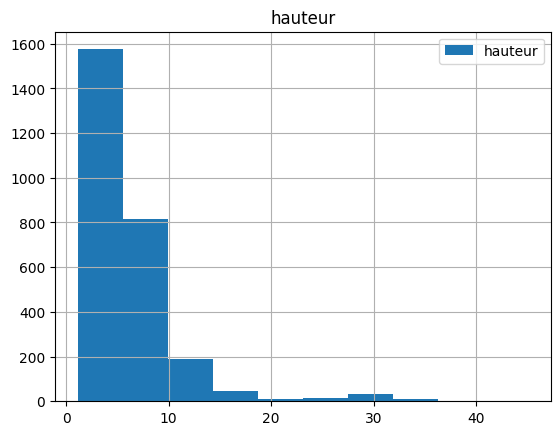

In [18]:
def plot_height_city(file, postal_code):
    """
    Display the histogramme of the building's height in the chosen city (choice made by postal_code)
    
    ---
    Parameters: 
    file : .gpkg, database
    postal_code : str 
    
    """
    gdf = gpd.read_file(file, layer='batiment_construction')
    gdf = gdf.groupby(by='code_commune_insee')
    print(gdf.groups.keys())
    sub_gdf = gdf.get_group(postal_code) 
    sub_gdf.hist('hauteur', bins=10, legend = True)
    plt.plot()
    
plot_height_city('bdnb.gpkg', '34344')
    
#En pratique, le code postal sera entré dans un formulaire sur l'interface web par l'utilisateur
#Idée : menu déroulant on rentre le nom de la commune et le code postal associé apparait (--> dictionnaire .json voir Emile)